In [1]:
import pandas as pd
import numpy as np
import names

import datetime
import itertools

In [2]:
P = pd.read_csv('data/trans_matrix.csv', index_col=0)

In [3]:
new_visitors_per_minute = pd.read_csv('data/new_visitors_per_minute.csv', index_col = 0)

In [4]:
new_visitors_per_minute

,0,1,2,3,4,5,6,7,8,9
hour,,,,,,,,,,
7,0.474576,0.084746,0.152542,0.067797,0.067797,0.084746,0.050847,0.000000,0.016949,0.000000
8,0.333333,0.150000,0.100000,0.166667,0.150000,0.050000,0.016667,0.016667,0.016667,0.000000
9,0.366667,0.166667,0.250000,0.066667,0.066667,0.033333,0.016667,0.016667,0.016667,0.000000
10,0.483333,0.133333,0.083333,0.133333,0.066667,0.016667,0.066667,0.016667,0.000000,0.000000
11,0.566667,0.150000,0.116667,0.100000,0.033333,0.016667,0.016667,0.000000,0.000000,0.000000
12,0.416667,0.183333,0.183333,0.133333,0.016667,0.033333,0.016667,0.016667,0.000000,0.000000
13,0.300000,0.116667,0.166667,0.166667,0.150000,0.016667,0.050000,0.033333,0.000000,0.000000
14,0.450000,0.133333,0.166667,0.083333,0.066667,0.000000,0.083333,0.016667,0.000000,0.000000
15,0.450000,0.083333,0.150000,0.150000,0.083333,0.050000,0.016667,0.000000,0.000000,0.016667


In [5]:
i = np.random.choice(list(new_visitors_per_minute.columns), p=new_visitors_per_minute.loc[7])


In [6]:
P

,entry,dairy,fruit,drinks,spices,checkout
entry,0,0.287576,0.377435,0.153526,0.181464,0.000000
dairy,0,0.737061,0.049789,0.058500,0.051307,0.103344
fruit,0,0.095848,0.597264,0.054804,0.050637,0.201447
drinks,0,0.010898,0.087900,0.598540,0.086974,0.215688
spices,0,0.193061,0.090880,0.162979,0.402515,0.150565
checkout,0,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
np.random.choice(list(P.index), p=P.loc['entry'])

'dairy'

In [8]:
class Customer:
    
    id_iter = itertools.count(start=1)

    def __init__(self, name, current_state="entry"):
        self.name = name
        self.current_state = current_state
        self.id = next(self.id_iter)

    def __repr__(self):
        return self.name

    def change_location(self):
        new_state = np.random.choice(list(P.index), p=P.loc[self.current_state])
        self.current_state = new_state

    def force_check_out(self):
        if self.current_state != 'checkout':
            self.current_state = 'checkout'

In [9]:
class Supermarket:

    def __init__(self):
        self.customers = []
        self.day_log = pd.DataFrame(columns=['time', 'customer_no', 'name', 'location'])

    def open(self):
        self.current_time = datetime.datetime(100,1,1,7,0,0)
        self.customers = []

    def add(self, customer):
        self.customers.append(customer)

    def add_nr_of_customers(self, number):
        name_list = [names.get_full_name() for x in range(1, number+1)]   
        new_customers = [Customer(i) for i in name_list]
        self.customers += new_customers       
    
    def information(self):
        for customer in self.customers:
            print (customer.name)

    def change_state(self):
        for customer in self.customers:
            current_location = customer.current_state
            customer.change_location()
            new_location = customer.current_state
            if current_location != new_location:
                self.day_log = self.day_log.append({'time':self.current_time.time(), 'customer_no':customer.id, 'name':customer.name, 'location':new_location}, ignore_index=True)

    def print_time(self):
        return (self.current_time.time())

    def show_log(self):
        return self.day_log

    def remove_checkout_cust(self):
        for customer in self.customers:
            if customer.current_state == 'checkout':
                self.customers.remove(customer)

    def run_simulation(self):
        while True:
            if self.current_time == datetime.datetime(100,1,1,21,50,0):
                for customer in self.customers:
                    current_location = customer.current_state
                    customer.force_check_out()
                    new_location = customer.current_state                   
                    self.day_log = self.day_log.append({'time':self.current_time.time(), 'customer_no':customer.id, 'name':customer.name, 'location':new_location}, ignore_index=True)
                return self.day_log
            current_hour = self.current_time.hour
            nr_cust = int(np.random.choice(list(new_visitors_per_minute.columns), p=new_visitors_per_minute.loc[current_hour]))
            if nr_cust > 0:
                self.add_nr_of_customers(nr_cust)
            self.change_state()
            self.current_time = self.current_time + datetime.timedelta(0,60)
            self.remove_checkout_cust()
            new_hour = self.current_time.hour
            if new_hour != current_hour:
                print ("Predicting ", current_hour+1, "o'clock")

In [10]:
supermarket1 = Supermarket()

In [11]:
supermarket1.open()

In [12]:
supermarket1.run_simulation()

Predicting  8 o'clock
Predicting  9 o'clock
Predicting  10 o'clock
Predicting  11 o'clock
Predicting  12 o'clock
Predicting  13 o'clock
Predicting  14 o'clock
Predicting  15 o'clock
Predicting  16 o'clock
Predicting  17 o'clock
Predicting  18 o'clock
Predicting  19 o'clock
Predicting  20 o'clock
Predicting  21 o'clock


,time,customer_no,name,location
0,07:00:00,1,Cathy Medina,fruit
1,07:00:00,2,Regina Padilla,dairy
2,07:01:00,1,Cathy Medina,checkout
3,07:02:00,3,Billie Macomber,dairy
4,07:02:00,4,Elsie Baylor,spices
...,...,...,...,...
5159,21:45:00,1553,Jose Jenkins,drinks
5160,21:46:00,1553,Jose Jenkins,checkout
5161,21:48:00,1554,Elena Kubota,dairy
5162,21:50:00,1546,Linda Heppner,checkout


In [13]:
log = supermarket1.show_log()

In [15]:
log.to_csv('data/simulated_supermarket_data.csv')

In [14]:
log['hour'] = log['time'].apply(lambda x: x.hour)

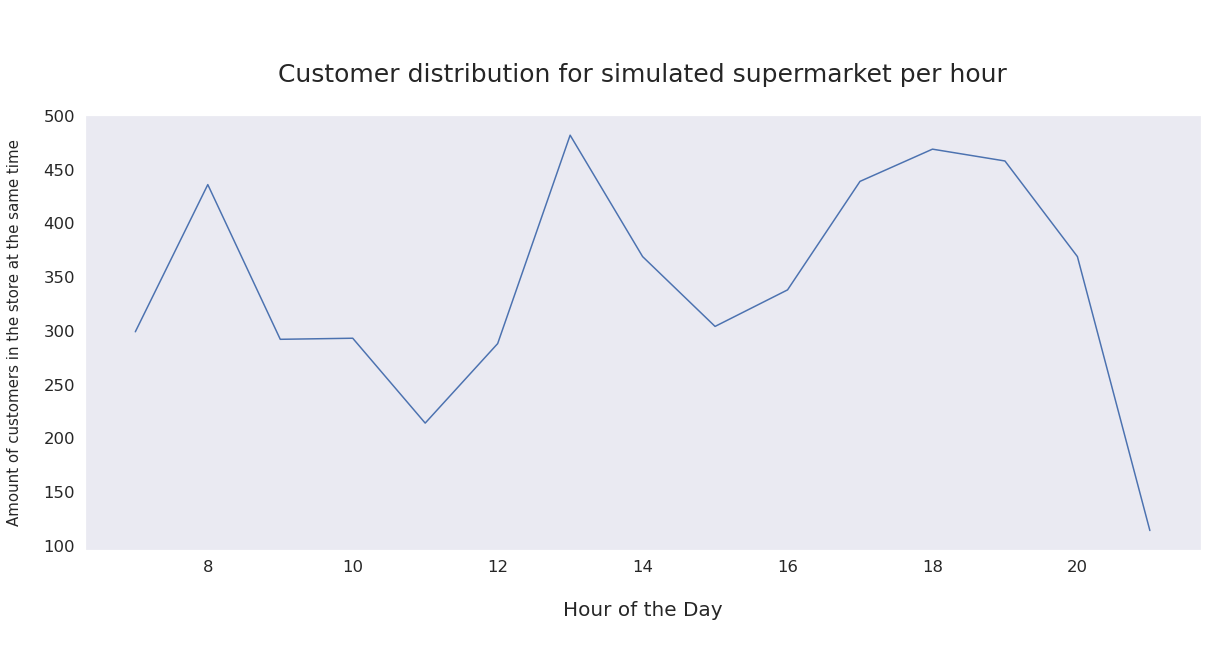

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.5)
import matplotlib.ticker as mtick
sns.set_style("dark")

fig = plt.gcf()
fig.set_size_inches(20,8)
p = sns.lineplot(x=log['hour'].unique(), y=log.groupby('hour')['customer_no'].count())
p.set_xlabel("\nHour of the Day\n", fontsize = 20)
p.set_ylabel("Amount of customers in the store at the same time\n", fontsize = 15)
p.set_title("\n\nCustomer distribution for simulated supermarket per hour\n", fontsize = 25);